<Axes: xlabel='Expense Category'>

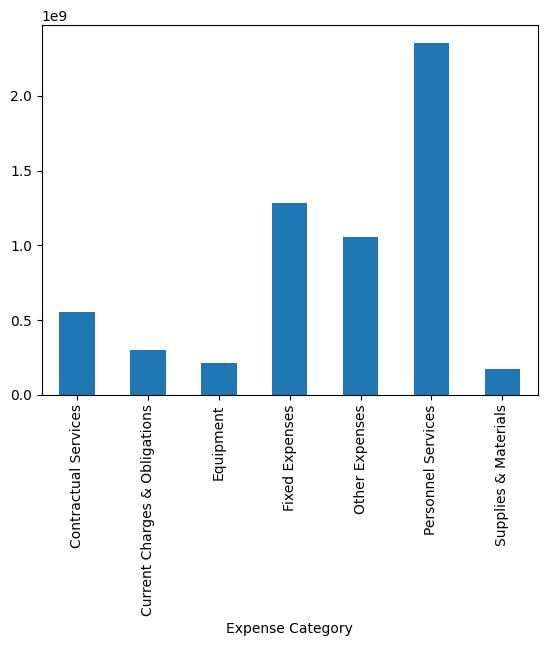

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# Read the data from the CSV file
cap_budg = pd.read_csv('./data/capital_budget.csv')
op_budg = pd.read_csv('./data/operating_budget.csv')

# Clean the data
op_budg.replace("#Missing", 0, inplace=True)
op_budg['FY22 Actual Expense'] = pd.to_numeric(op_budg['FY22 Actual Expense'].str.replace(',', ''))
op_budg['FY23 Actual Expense'] = pd.to_numeric(op_budg['FY23 Actual Expense'].str.replace(',', ''))
op_budg['FY24 Appropriation'] = pd.to_numeric(op_budg['FY24 Appropriation'].str.replace(',', ''))
op_budg['FY25 Budget'] = pd.to_numeric(op_budg['FY25 Budget'].str.replace(',', ''))

# Plot the capital budget's total project budget for each department
cap_budg.groupby('Department')['Total_Project_Budget'].sum().plot(kind='bar')

op_budg.groupby('Expense Category')['FY22 Actual Expense'].sum().plot(kind='bar')

op_budg.groupby('Expense Category')['FY23 Actual Expense'].sum().plot(kind='bar')

op_budg.groupby('Expense Category')['FY24 Appropriation'].sum().plot(kind='bar')

op_budg.groupby('Expense Category')['FY25 Budget'].sum().plot(kind='bar')

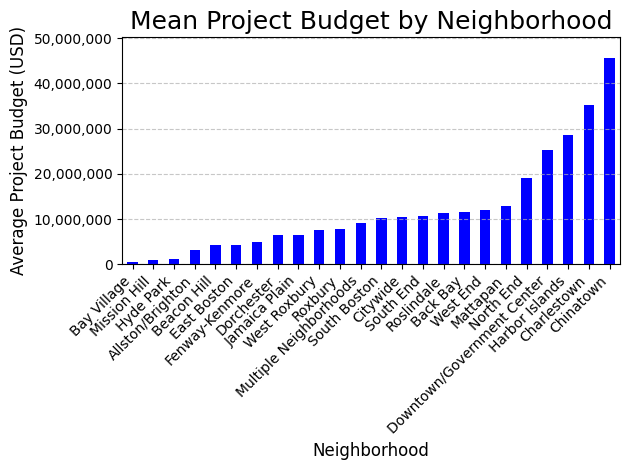

Neighborhood
Bay Village                      508,333.33
Mission Hill                     923,702.00
Hyde Park                      1,257,500.00
Allston/Brighton               3,112,860.00
Beacon Hill                    4,301,250.00
East Boston                    4,318,250.00
Fenway-Kenmore                 4,983,270.20
Dorchester                     6,402,030.21
Jamaica Plain                  6,456,923.08
West Roxbury                   7,687,000.00
Roxbury                        7,819,558.12
Multiple Neighborhoods         9,024,790.25
South Boston                  10,174,998.25
Citywide                      10,426,966.87
South End                     10,689,131.47
Roslindale                    11,368,888.89
Back Bay                      11,615,000.00
West End                      12,000,000.00
Mattapan                      12,845,145.67
North End                     19,101,991.80
Downtown/Government Center    25,246,538.46
Harbor Islands                28,629,690.67
Charlestown        

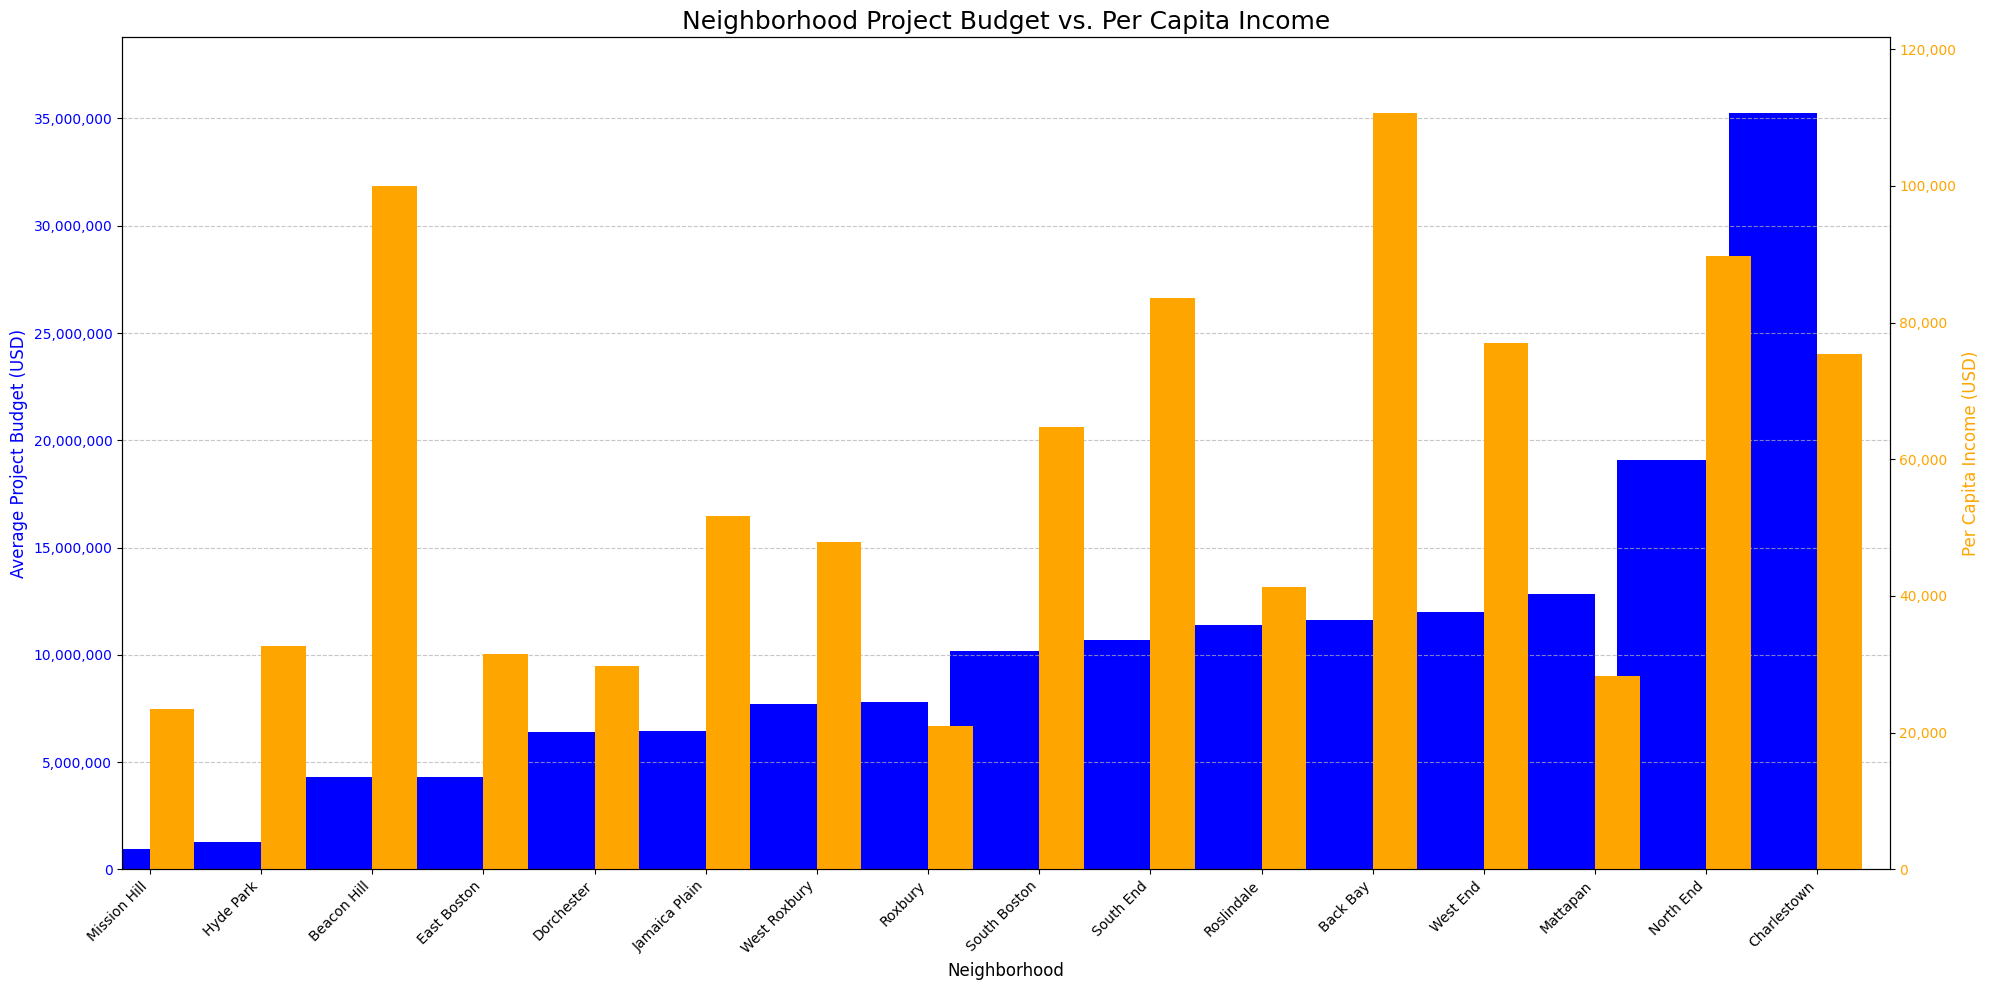

Correlation between Project Budget and Per Capita Income: 0.40


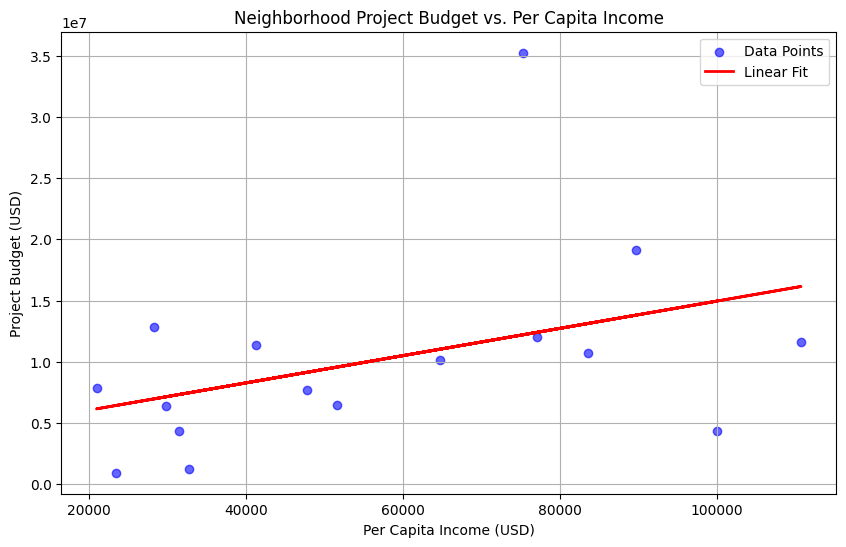

In [2]:
#Neighborhood spending breakdown. 
#Repeat of geographic charts for visualization.ipynb...
neighborhood_budg = cap_budg.groupby('Neighborhood')['Total_Project_Budget'].mean().sort_values(ascending=True)
neighborhood_budg.plot(kind='bar', color='blue')

plt.title('Mean Project Budget by Neighborhood', fontsize=18)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Project Budget (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.ylim(0, neighborhood_budg.max() * 1.1)  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

print(neighborhood_budg.apply(lambda x: f"{x:,.2f}")) #Formats float to two decimal places & comas

# Load and clean neighborhood income data
npi = pd.read_csv('./data/2015-2019_neighborhood_tables_2021.12.21.csv')
npi.columns = ['Neighborhood', 'Total Population', 'Income', 'Per Capita Income']
npi = npi[['Neighborhood', 'Total Population', 'Income', 'Per Capita Income']].dropna()
npi = npi.iloc[3:].reset_index(drop=True)
npi['Total Population'] = npi['Total Population'].str.replace(',', '').astype(int)
npi['Income'] = npi['Income'].str.replace(',', '').str.replace('$', '').astype(float)
npi['Per Capita Income'] = npi['Per Capita Income'].str.replace(',', '').str.replace('$', '').astype(float)

# Load and calculate neighborhood budget data


# Merge the two datasets
combined_df = pd.DataFrame({
    'Project Budget': neighborhood_budg,
    'Per Capita Income': npi.set_index('Neighborhood')['Per Capita Income']
}).dropna()  # Ensure no NaN values

# Sort by Project Budget in ascending order
combined_df = combined_df.sort_values(by='Project Budget', ascending=True)

# Create figure and bar chart with dual y-axis
fig, ax1 = plt.subplots(figsize=(20, 10))  # Increase width for more spacing

# Plot Project Budget on primary y-axis
combined_df['Project Budget'].plot(kind='bar', color='blue', ax=ax1, width=0.8, position=1)
ax1.set_ylabel('Average Project Budget (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, combined_df['Project Budget'].max() * 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for Per Capita Income
ax2 = ax1.twinx()
combined_df['Per Capita Income'].plot(kind='bar', color='orange', ax=ax2, width=0.4, position=0)
ax2.set_ylabel('Per Capita Income (USD)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, combined_df['Per Capita Income'].max() * 1.1)

# General plot settings
plt.title('Neighborhood Project Budget vs. Per Capita Income', fontsize=18)
ax1.set_xlabel('Neighborhood', fontsize=12)
ax1.set_xticks(range(len(combined_df)))
ax1.set_xticklabels(combined_df.index, rotation=45, ha='right')

# Adjust space between bars
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to fit x-axis labels

# Format y-axes with commas for large numbers
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#DIFFICULT TO SEE RELATIONSHIP BETWEEN NEIGHBORHOOD SPENDING AND INCOME

# Disable scientific notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate the correlation coef
correlation = combined_df['Project Budget'].corr(combined_df['Per Capita Income'])
print(f"Correlation between Project Budget and Per Capita Income: {correlation:.2f}")
    #A positive correlation (e.g., > 0.5) would suggest that neighborhoods with higher per capita incomes tend to have higher spending, 
    #negative correlation would suggest the opposite. Values around 0 indicate weak or no linear relationship.



from sklearn.linear_model import LinearRegression

X = combined_df[['Per Capita Income']].values
Y = combined_df['Project Budget'].values

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Per Capita Income'], combined_df['Project Budget'], color='blue', alpha=0.6, label='Data Points')
plt.plot(combined_df['Per Capita Income'], y_pred, color='red', linewidth=2, label='Linear Fit')
plt.title('Neighborhood Project Budget vs. Per Capita Income')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Project Budget (USD)')
plt.grid(True)
plt.legend()

plt.show()

Outliers Identified:
              Per Capita Income  Project Budget  Z_Score_Income  \
Neighborhood                                                      
Charlestown            75339.00     35257578.76            0.65   

              Z_Score_Budget  
Neighborhood                  
Charlestown             3.18  


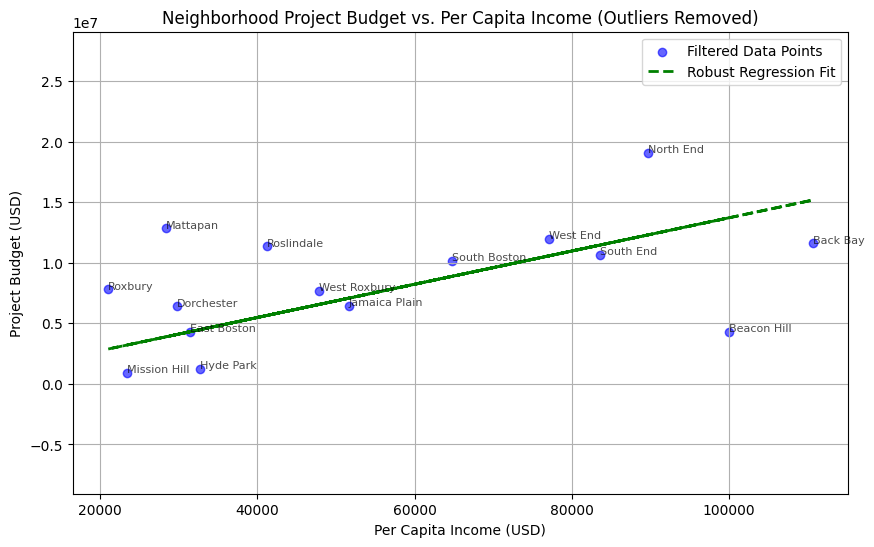

Correlation between Project Budget and Per Capita Income: 0.47
R²: 0.04
Root Mean Squared Error (RMSE): 4560126.80


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Step 1: Calculate Z-scores for both variables
combined_df['Z_Score_Income'] = zscore(combined_df['Per Capita Income'])
combined_df['Z_Score_Budget'] = zscore(combined_df['Project Budget'])

# Step 2: Filter out outliers based on Z-score threshold (e.g., |z| > 3)
outliers = combined_df[
    (combined_df['Z_Score_Income'].abs() > 3) | 
    (combined_df['Z_Score_Budget'].abs() > 3)
]

# Print the outliers with neighborhood names
print("Outliers Identified:")
print(outliers[['Per Capita Income', 'Project Budget', 'Z_Score_Income', 'Z_Score_Budget']])

# Step 3: Remove outliers from the dataset for regression
filtered_df = combined_df.drop(outliers.index)

# Prepare filtered data for regression
X_filtered = filtered_df[['Per Capita Income']].values
Y_filtered = filtered_df['Project Budget'].values

# Step 3: Fit a robust regression model
robust_model = HuberRegressor()
robust_model.fit(X_filtered, Y_filtered)

# Predict on the filtered dataset
y_robust_pred = robust_model.predict(X_filtered)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Per Capita Income'], filtered_df['Project Budget'], 
            color='blue', alpha=0.6, label='Filtered Data Points')
for i in range(len(filtered_df)):
    plt.text(filtered_df['Per Capita Income'].iloc[i], 
             filtered_df['Project Budget'].iloc[i], 
             filtered_df.index[i],  # Assuming the index is the neighborhood name
             fontsize=8, 
             alpha=0.7, 
             color='black')
plt.plot(filtered_df['Per Capita Income'], y_robust_pred, 
         color='green', linewidth=2, linestyle='--', label='Robust Regression Fit')
plt.title('Neighborhood Project Budget vs. Per Capita Income (Outliers Removed)')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Project Budget (USD)')
plt.grid(True)
plt.legend()
plt.ylim(min(Y_filtered) - 10000000, max(Y_filtered) + 10000000)

plt.show()

correlation = filtered_df['Project Budget'].corr(filtered_df['Per Capita Income'])
print(f"Correlation between Project Budget and Per Capita Income: {correlation:.2f}")

from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² and RMSE
r2 = r2_score(Y_filtered, y_robust_pred)
rmse = np.sqrt(mean_squared_error(Y_filtered, y_robust_pred))

print(f"R²: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Z-score was calculated to filter out outliers. Any data point with a z-score > 3 or < -3 was considering an outlier and excluded from this regression model.

Charlestown's z-score for income was within a normal range, but its z-score for budget exceeded 3. Assuming a normal distribution of data, having a budget 3 standard deviations away from the mean is improbabale at only about a 0.3% chance. Thus, this value was considered an outlier and filtered out.

Huber regression, a linear regression model robust to outliers, was used to draw up a new graph. This one shows a greater trend upwards once the one outlier was removed.

A correlation coefficient, calculated the same way as in in the previous data visualization shows a score of 0.47. This shows a positive trend between the two variables, BUT the low R^2 value shows that per capita income in specific neighborhoods only accounts for about 4% of the variation we see in neighborhood spending.


Variability in the data, & general non-linearity of data points reduce linear regression's effectiveness.

NEXT STEPS:  more feature engineering -- population size of neighborhoods, total # of projects, etc.

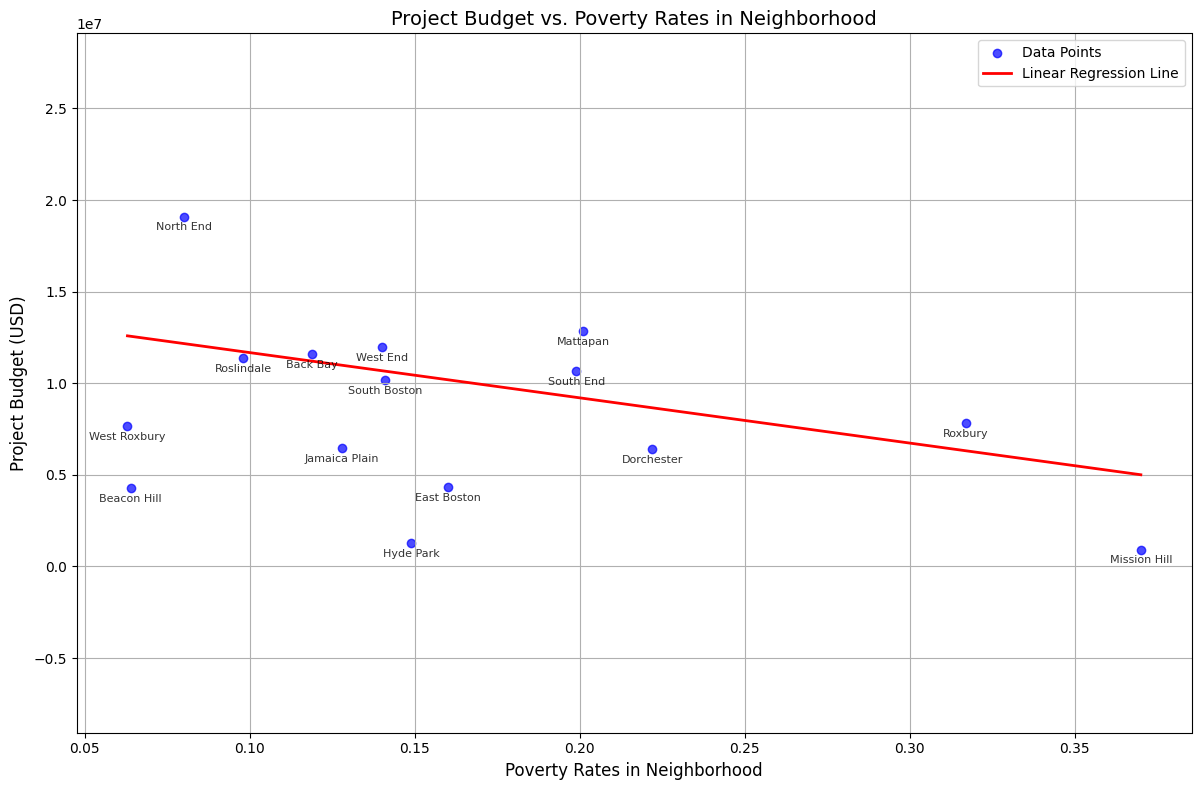

Slope (Coefficient): -24702082.86
Intercept: 14145053.33
Correlation between Project Budget and Poverty rate: -0.26


In [4]:
# Load and clean neighborhood race data
poverty_data = pd.read_csv('./data/2015-2019_neighborhood_data_povertyrates.csv')
poverty_data['Poverty rate'] = pd.to_numeric(poverty_data['Poverty rate'].str.replace('%', '').astype(float)) / 100

# Merge race data and project budget data on 'Neighborhood'
pd_combined_df = pd.merge(poverty_data, neighborhood_budg, on='Neighborhood', how='outer')
pd_combined_df = pd_combined_df.dropna(subset=['Poverty rate', 'Total_Project_Budget'])

X = pd_combined_df[['Poverty rate']].values  # Independent variable (poverty rate)
Y = pd_combined_df['Total_Project_Budget'].values  # Dependent variable (project budget)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, Y)

# Predict values for the regression line
X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
Y_line = linear_model.predict(X_line)

# Scatter plot with neighborhood names below points
plt.figure(figsize=(12, 8))
plt.scatter(pd_combined_df['Poverty rate'], pd_combined_df['Total_Project_Budget'], color='blue', alpha=0.7, label='Data Points')

# Plot the regression line
plt.plot(X_line, Y_line, color='red', linewidth=2, label='Linear Regression Line')

# Annotate each point with the neighborhood name below it
for i, row in pd_combined_df.iterrows():
    plt.annotate(
        row['Neighborhood'], 
        (row['Poverty rate'], row['Total_Project_Budget']),
        textcoords="offset points",  # Position relative to the data point
        xytext=(0, -10),  # Offset below the point
        ha='center',  # Center-align the text horizontally
        fontsize=8, alpha=0.8
    )

# Add plot titles, labels, and legend
plt.title('Project Budget vs. Poverty Rates in Neighborhood', fontsize=14)
plt.xlabel('Poverty Rates in Neighborhood', fontsize=12)
plt.ylabel('Project Budget (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(min(Y_filtered) - 10000000, max(Y_filtered) + 10000000)

# Show the plot
plt.show()

# Print model coefficients
print(f"Slope (Coefficient): {linear_model.coef_[0]:.2f}")
print(f"Intercept: {linear_model.intercept_:.2f}")

correlation = pd_combined_df['Total_Project_Budget'].corr(pd_combined_df['Poverty rate'])
print(f"Correlation between Project Budget and Poverty rate: {correlation:.2f}")
